In [117]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.metrics import r2_score 

# for plotly graph, following library should we have to Import
import plotly.express as px
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
print(__version__) # requires version >= 1.9.0
init_notebook_mode(connected=True)

4.14.3


In [118]:
Data = pd.read_csv(r'C:\Users\Dell\Desktop\ANALYTICS\Data Science Project by Python\Stock Price Prediction\Dataset\Infosys.csv')

In [119]:
Data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-04-01,608.000000,611.099976,597.549988,602.724976,525.702698,5511428.0
1,2016-04-04,606.775024,624.000000,606.775024,621.849976,542.383850,4577054.0
2,2016-04-05,621.000000,621.150024,607.000000,609.900024,531.960938,4790716.0
3,2016-04-06,614.000000,614.000000,598.000000,600.349976,523.631287,4931354.0
4,2016-04-07,604.200012,604.200012,587.500000,590.750000,515.258118,5657890.0


In [120]:
Data.shape

(1233, 7)

In [121]:
# Adding tick values for linear regression
Data['Tick'] = range(1,1+len(Data['Close']))
Data = Data[['Tick','Close']]
Data.head()

,Tick,Close
0,1,602.724976
1,2,621.849976
2,3,609.900024
3,4,600.349976
4,5,590.750000


In [122]:
# Removing null/NA values
Data.dropna(inplace=True)

In [123]:
# Convert data into dataframe for the performing operation
Data = pd.DataFrame(Data)

In [124]:
Data.shape

(1231, 2)

<AxesSubplot:xlabel='Close'>

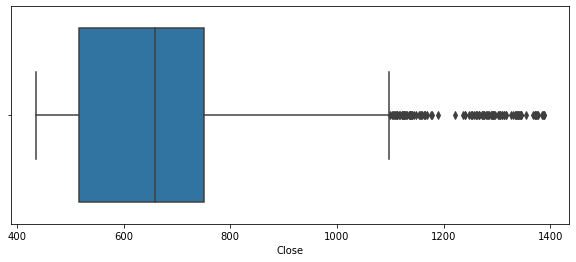

In [125]:
# Boxplot is the best plot for the data distribution and for finding outlier.
plt.figure(figsize=(10,4))
sns.boxplot(data=Data, x='Close')

In [126]:
# For the calculating z value for finding outlier.
from sklearn import preprocessing

In [127]:
Data['SC_Close'] = preprocessing.scale(Data['Close'])

In [128]:
# Z value more than is considered as a outlier, so kept only less than 3.
Data = Data[Data['SC_Close'].abs()<3]

In [129]:
Data.shape

(1218, 3)

In [130]:
Data = Data[['Tick', 'Close']]

In [131]:
Data.shape

(1218, 2)

In [132]:
# For the getting model summary

import statsmodels.api as sm

import statsmodels.formula.api as smf

In [133]:
X_train, X_test, y_train, y_test = train_test_split(Data[['Tick']], Data['Close'] , test_size=0.2, random_state=42)

In [134]:
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (974, 1)
X_test:  (244, 1)
y_train:  (974,)
y_test:  (244,)


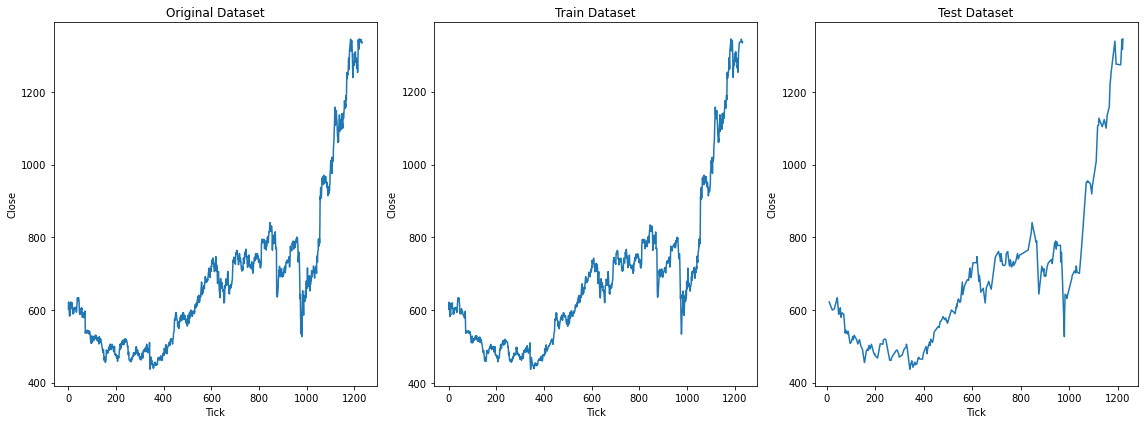

In [135]:
# Let's check the original, train and test data (Close vs Tick)
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.lineplot(x=Data['Tick'], y=Data['Close'])
plt.title('Original Dataset')
plt.subplot(1,3,2)
sns.lineplot(x=X_train['Tick'], y=y_train)
plt.title('Train Dataset')
plt.subplot(1,3,3)
sns.lineplot(x=X_test['Tick'], y=y_test)
plt.title('Test Dataset')
plt.tight_layout()

In [136]:
Model = LinearRegression()

In [137]:
Model.fit(X_train, y_train)

LinearRegression()

In [138]:
X_train = pd.DataFrame(X_train)

In [139]:
Train = X_train.join(y_train, how='inner')

In [140]:
X_test = pd.DataFrame(X_test)

In [141]:
Test = X_test.join(y_test, how='inner')

In [142]:
Result = smf.ols(data=Data, formula = 'Close ~ Tick').fit()
print(Result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     2413.
Date:                Fri, 30 Apr 2021   Prob (F-statistic):          5.65e-291
Time:                        00:00:30   Log-Likelihood:                -7559.1
No. Observations:                1218   AIC:                         1.512e+04
Df Residuals:                    1216   BIC:                         1.513e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    391.9864      6.879     56.985      0.0

In [143]:
R_square_Simple_Model = r2_score(Data[['Close']], Model.predict(Data[['Tick']]))
print(R_square_Simple_Model)

0.6647760020658093


In [144]:
Adjusted_R_squared = 1 - (1-R_square_Simple_Model)*(len(Data['Close'])-1)/(len(Data['Close'])-Data.shape[1]-1)
Adjusted_R_squared

0.6642241930157119

In [145]:
np.set_printoptions(precision=3) # for decimal point reduce to 3

In [146]:
Model_Equation = f"Close = {round(Model.intercept_,2)} + Tick({round(Model.coef_[0],2)})"

In [147]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import math

In [148]:
MSE  = mean_squared_error(Test[['Close']], Model.predict(Test[['Tick']]))
RMSE = math.sqrt(MSE)
MAE = mean_absolute_error(Test[['Close']], Model.predict(Test[['Tick']]))
MAPE = mean_absolute_percentage_error(Test[['Close']], Model.predict(Test[['Tick']]))
print('MSE_Test : ', MSE)
print('RMSE_Test: ', RMSE)
print('MAE_Test: ', MAE)
print('MAPE_Test: ', MAPE*100)

MSE_Test :  13985.617753685463
RMSE_Test:  118.26080396177537
MAE_Test:  87.32505774537216
MAPE_Test:  13.020502989244198


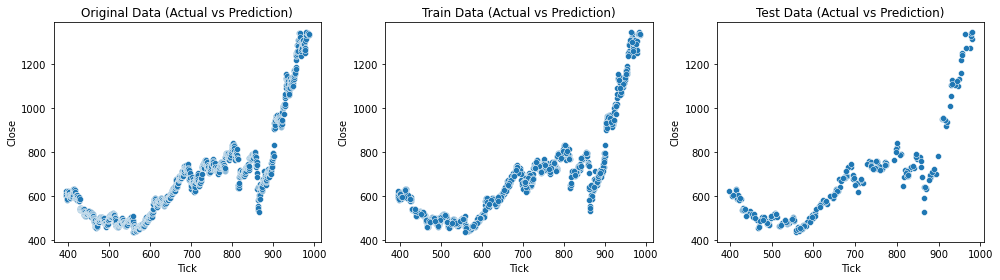

In [149]:
# Let's check the actual vs predicted data distribution graph.
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
sns.scatterplot(x=Model.predict(Data[['Tick']]), y=Data['Close'])
plt.xlabel('Tick')
plt.title('Original Data (Actual vs Prediction)')
plt.subplot(1,3,2)
sns.scatterplot(x=Model.predict(X_train[['Tick']]), y=y_train)
plt.xlabel('Tick')
plt.title('Train Data (Actual vs Prediction)')
plt.subplot(1,3,3)
sns.scatterplot(x=Model.predict(X_test[['Tick']]), y=y_test)
plt.xlabel('Tick')
plt.title('Test Data (Actual vs Prediction)')
plt.tight_layout()

# Now let's check the moving average of stock 

In [150]:
# for the testing we have to check Simple moving average, Exponential Moving average and Weighted moving average

# Simple Moving Average 

In [151]:
Data['MA_100'] = Data['Close'].rolling(100, min_periods=1).mean()

In [152]:
Data = Data[110:]

In [153]:
MA = Data.copy()

In [154]:
X_train_MA, X_test_MA, y_train_MA, y_test_MA = train_test_split(MA[['Tick']], MA[['MA_100']] , test_size=0.2, random_state=42)

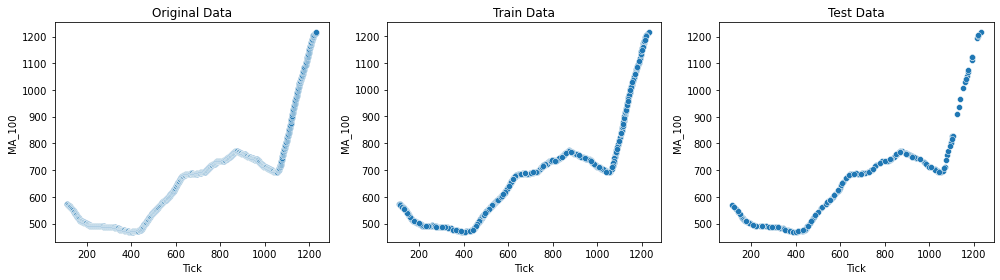

In [155]:
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
sns.scatterplot(x=MA['Tick'], y=MA['MA_100'])
plt.xlabel('Tick')
plt.title('Original Data')
plt.subplot(1,3,2)
sns.scatterplot(x=X_train_MA['Tick'], y=y_train_MA['MA_100'])
plt.xlabel('Tick')
plt.title('Train Data')
plt.subplot(1,3,3)
sns.scatterplot(x=X_test_MA['Tick'], y=y_test_MA['MA_100'])
plt.xlabel('Tick')
plt.title('Test Data')
plt.tight_layout()

In [156]:
Model_MA = LinearRegression()

In [157]:
Model_MA.fit(X_train_MA, y_train_MA)

LinearRegression()

In [158]:
Predict_Original = Model_MA.predict(MA[['Tick']])
Predict_Train = Model_MA.predict(X_train_MA[['Tick']])
Predict_Test = Model_MA.predict(X_test_MA[['Tick']])

In [159]:
Predict_Original = pd.DataFrame(Predict_Original)
Predict_Train = pd.DataFrame(Predict_Train)
Predict_Test = pd.DataFrame(Predict_Test)

In [160]:
Predict_Original.columns = ['Predict']
Predict_Train.columns = ['Predict']
Predict_Test.columns = ['Predict']

<AxesSubplot:xlabel='Predict', ylabel='MA_100'>

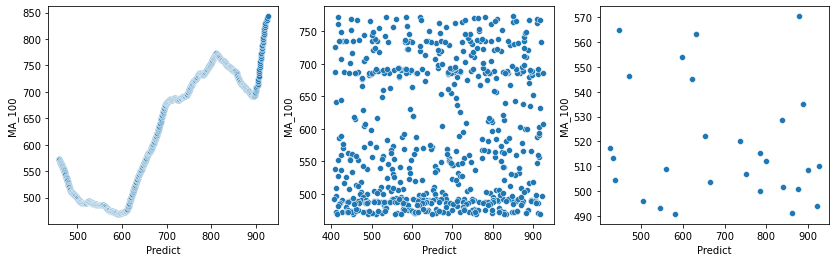

In [161]:
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
sns.scatterplot(x=Predict_Original['Predict'], y=MA['MA_100'])
plt.subplot(1,3,2)
sns.scatterplot(x=Predict_Train['Predict'], y=y_train_MA['MA_100'])
plt.subplot(1,3,3)
sns.scatterplot(x=Predict_Test['Predict'], y=y_test_MA['MA_100'])

In [162]:
MSE_Test  = mean_squared_error(Predict_Test[['Predict']], y_test_MA[['MA_100']])
RMSE_Test = math.sqrt(MSE)
MAE_Test = mean_absolute_error(Predict_Test[['Predict']], y_test_MA[['MA_100']])
MAPE_Test = mean_absolute_percentage_error(Predict_Test[['Predict']], y_test_MA[['MA_100']])
print('MSE_Test : ', MSE_Test)
print('RMSE_Test: ', RMSE_Test)
print('MAE_Test: ', MAE_Test)
print('MAPE_Test: ', MAPE_Test*100)

MSE_Test :  6449.863310050478
RMSE_Test:  118.26080396177537
MAE_Test:  56.574405274922086
MAPE_Test:  8.732594142002533


In [163]:
MA_Original = smf.ols(data=MA, formula = 'MA_100 ~ Tick').fit()
print(MA_Original.summary())

                            OLS Regression Results                            
Dep. Variable:                 MA_100   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     3688.
Date:                Fri, 30 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:01:10   Log-Likelihood:                -6438.4
No. Observations:                1108   AIC:                         1.288e+04
Df Residuals:                    1106   BIC:                         1.289e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    357.6530      5.594     63.931      0.0

In [164]:
Model_Equation_MA = f"Close = {round(Model_MA.intercept_[0],2)} + Tick({round(Model_MA.coef_[0][0],2)})"

In [165]:
R_square_MA_Model = r2_score(MA[['MA_100']], Model_MA.predict(MA[['Tick']]))
print(R_square_MA_Model)

0.7692433842938039


In [166]:
Adjusted_R_squared_MA = 1 - (1-R_square_MA_Model)*(len(MA['MA_100'])-1)/(len(MA['MA_100'])-MA.shape[1]-1)
Adjusted_R_squared_MA

0.7686163282728631

# Cummulative Moving Average

In [167]:
Data['CA'] = Data['Close'].expanding().mean()

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [168]:
CA = Data.copy()

In [169]:
X_train_CA, X_test_CA, y_train_CA, y_test_CA = train_test_split(CA[['Tick']], CA[['CA']] , test_size=0.2, random_state=42)

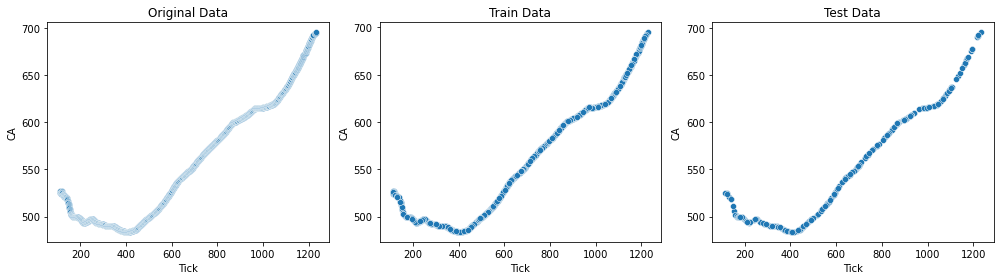

In [170]:
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
sns.scatterplot(x=CA['Tick'], y=CA['CA'])
plt.xlabel('Tick')
plt.title('Original Data')
plt.subplot(1,3,2)
sns.scatterplot(x=X_train_CA['Tick'], y=y_train_CA['CA'])
plt.xlabel('Tick')
plt.title('Train Data')
plt.subplot(1,3,3)
sns.scatterplot(x=X_test_CA['Tick'], y=y_test_CA['CA'])
plt.xlabel('Tick')
plt.title('Test Data')
plt.tight_layout()

In [171]:
Model_CA = LinearRegression().fit(X_train_CA, y_train_CA)

In [172]:
Predict_Original_CA = Model_CA.predict(CA[['Tick']])
Predict_Train_CA = Model_CA.predict(X_train_CA[['Tick']])
Predict_Test_CA = Model_CA.predict(X_test_CA[['Tick']])

In [173]:
Predict_Original_CA = pd.DataFrame(Predict_Original_CA)
Predict_Train_CA = pd.DataFrame(Predict_Train_CA)
Predict_Test_CA = pd.DataFrame(Predict_Test_CA)

In [174]:
Predict_Original_CA.columns = ['Predict']
Predict_Train_CA.columns = ['Predict']
Predict_Test_CA.columns = ['Predict']

<AxesSubplot:xlabel='Predict', ylabel='Close'>

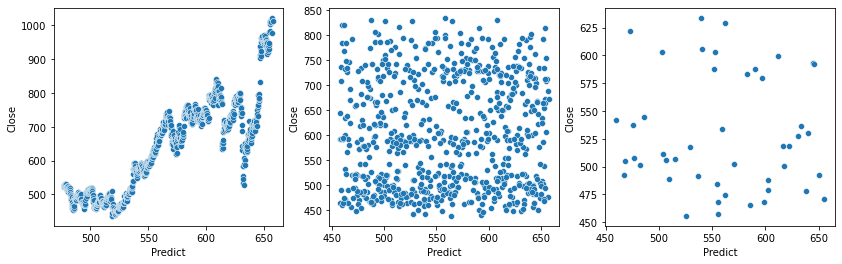

In [175]:
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
sns.scatterplot(x=Predict_Original_CA['Predict'], y=Data['Close'])
plt.subplot(1,3,2)
sns.scatterplot(x=Predict_Train_CA['Predict'], y=Train['Close'])
plt.subplot(1,3,3)
sns.scatterplot(x=Predict_Test_CA['Predict'], y=Test['Close'])

In [176]:
MSE_Test_CA  = mean_squared_error(Predict_Test_CA[['Predict']], y_test_CA[['CA']])
RMSE_Test_CA = math.sqrt(MSE_Test_CA)
MAE_Test_CA = mean_absolute_error(Predict_Test_CA[['Predict']], y_test_CA[['CA']])
MAPE_Test_CA = mean_absolute_percentage_error(Predict_Test_CA[['Predict']], y_test_CA[['CA']])
print('MSE_Test_CA : ', MSE_Test_CA)
print('RMSE_Test_CA: ', RMSE_Test_CA)
print('MAE_Test_CA: ', MAE_Test_CA)
print('MAPE_Test_CA: ', MAPE_Test_CA*100)

MSE_Test_CA :  412.537784373919
RMSE_Test_CA:  20.31102617727423
MAE_Test_CA:  15.228974226908853
MAPE_Test_CA:  2.9202052753373597


In [177]:
CA_Original = smf.ols(data=CA, formula = 'CA ~ Tick').fit()
print(CA_Original.summary())

                            OLS Regression Results                            
Dep. Variable:                     CA   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     8782.
Date:                Fri, 30 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:01:16   Log-Likelihood:                -4904.0
No. Observations:                1108   AIC:                             9812.
Df Residuals:                    1106   BIC:                             9822.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    438.2263      1.401    312.881      0.0

In [178]:
Model_Equation_CA = f"Close = {round(Model_CA.intercept_[0],2)} + Tick({round(Model_CA.coef_[0][0],2)})"

In [179]:
R_square_CA_Model = r2_score(CA[['CA']], Model_CA.predict(CA[['Tick']]))
print(R_square_CA_Model)

0.8881319673124929


In [180]:
Adjusted_R_squared_CA = 1 - (1-R_square_CA_Model)*(len(CA['CA'])-1)/(len(CA['CA'])-CA.shape[1]-1)
Adjusted_R_squared_CA

0.887726280883889

## Exponential Moving Average

In [181]:
Data['EA'] = Data['Close'].ewm(alpha = 0.1, adjust = False).mean()

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [182]:
EA = Data.copy()

In [183]:
X_train_EA, X_test_EA, y_train_EA, y_test_EA = train_test_split(EA[['Tick']], EA[['EA']] , test_size=0.2, random_state=42)

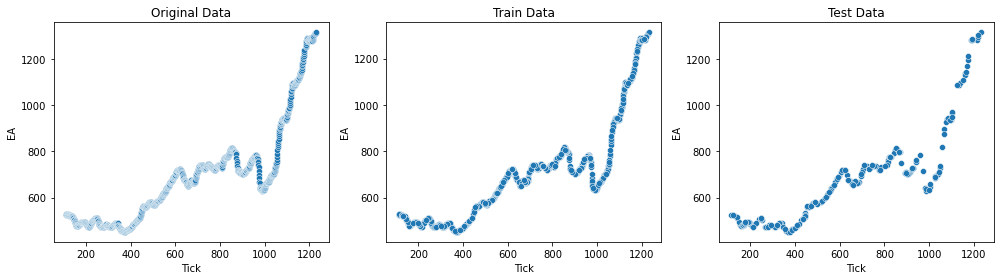

In [184]:
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
sns.scatterplot(x=EA['Tick'], y=EA['EA'])
plt.xlabel('Tick')
plt.title('Original Data')
plt.subplot(1,3,2)
sns.scatterplot(x=X_train_EA['Tick'], y=y_train_EA['EA'])
plt.xlabel('Tick')
plt.title('Train Data')
plt.subplot(1,3,3)
sns.scatterplot(x=X_test_EA['Tick'], y=y_test_EA['EA'])
plt.xlabel('Tick')
plt.title('Test Data')
plt.tight_layout()

In [185]:
Model_EA = LinearRegression().fit(X_train_EA, y_train_EA)

In [186]:
Predict_Original_EA = Model_EA.predict(EA[['Tick']])
Predict_Train_EA = Model_EA.predict(X_train_EA[['Tick']])
Predict_Test_EA = Model_EA.predict(X_test_EA[['Tick']])

In [187]:
Predict_Original_EA = pd.DataFrame(Predict_Original_EA)
Predict_Train_EA = pd.DataFrame(Predict_Train_EA)
Predict_Test_EA = pd.DataFrame(Predict_Test_EA)

In [188]:
Predict_Original_EA.columns = ['Predict']
Predict_Train_EA.columns = ['Predict']
Predict_Test_EA.columns = ['Predict']

<AxesSubplot:xlabel='Predict', ylabel='Close'>

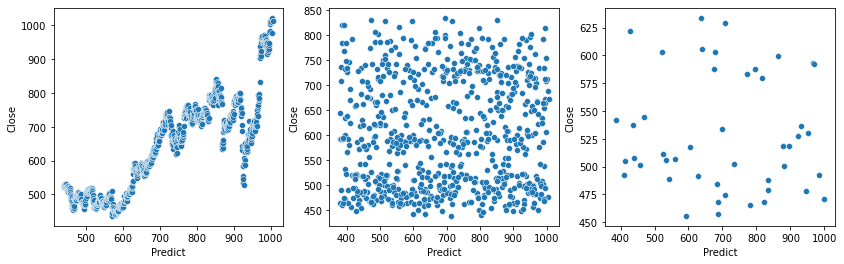

In [189]:
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
sns.scatterplot(x=Predict_Original_EA['Predict'], y=Data['Close'])
plt.subplot(1,3,2)
sns.scatterplot(x=Predict_Train_EA['Predict'], y=Train['Close'])
plt.subplot(1,3,3)
sns.scatterplot(x=Predict_Test_EA['Predict'], y=Test['Close'])

In [190]:
MSE_Test_EA  = mean_squared_error(Predict_Test_EA[['Predict']], y_test_EA[['EA']])
RMSE_Test_EA = math.sqrt(MSE_Test_EA)
MAE_Test_EA = mean_absolute_error(Predict_Test_EA[['Predict']], y_test_EA[['EA']])
MAPE_Test_EA = mean_absolute_percentage_error(Predict_Test_EA[['Predict']], y_test_EA[['EA']])
print('MSE_Test_EA : ', MSE_Test_EA)
print('RMSE_Test_EA: ', RMSE_Test_EA)
print('MAE_Test_EA: ', MAE_Test_EA)
print('MAPE_Test_EA: ', MAPE_Test_EA*100)

MSE_Test_EA :  10303.512638652537
RMSE_Test_EA:  101.50621970427495
MAE_Test_EA:  69.1320663103375
MAPE_Test_EA:  9.893387741291756


In [191]:
EA_Original = smf.ols(data=EA, formula = 'EA ~ Tick').fit()
print(EA_Original.summary())

                            OLS Regression Results                            
Dep. Variable:                     EA   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     3287.
Date:                Fri, 30 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:01:20   Log-Likelihood:                -6706.7
No. Observations:                1108   AIC:                         1.342e+04
Df Residuals:                    1106   BIC:                         1.343e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    320.8442      7.127     45.018      0.0

In [192]:
Model_Equation_EA = f"Close = {round(Model_EA.intercept_[0],2)} + Tick({round(Model_EA.coef_[0][0],2)})"

In [193]:
R_square_EA_Model = r2_score(EA[['EA']], Model_EA.predict(EA[['Tick']]))
print(R_square_EA_Model)

0.7481621703677064


In [194]:
Adjusted_R_squared_EA = 1 - (1-R_square_EA_Model)*(len(EA['EA'])-1)/(len(EA['EA'])-EA.shape[1]-1)
Adjusted_R_squared_EA

0.747019530487342

## Comparision of all model 

In [195]:
# Let's compare the all graphs by different model

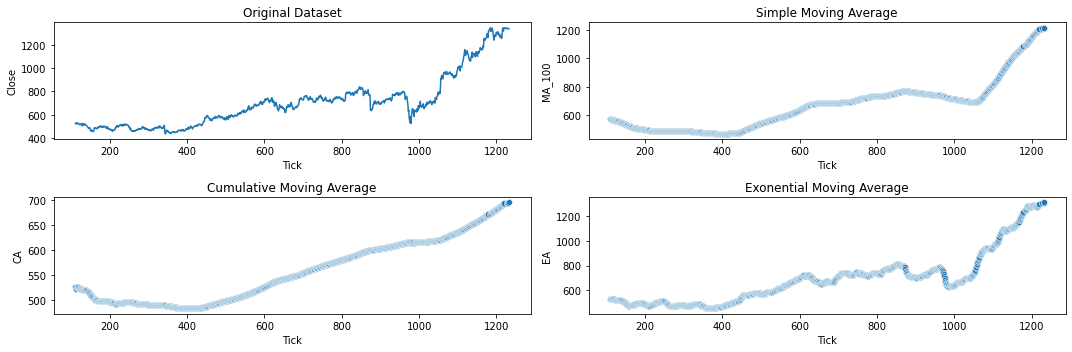

In [196]:
plt.figure(figsize=(15,5))
plt.subplot(2,2,1)
sns.lineplot(x=Data['Tick'], y=Data['Close'])
plt.title('Original Dataset')
plt.subplot(2,2,2)
sns.scatterplot(x=MA['Tick'], y=MA['MA_100'])
plt.xlabel('Tick')
plt.title('Simple Moving Average')
plt.subplot(2,2,3)
sns.scatterplot(x=CA['Tick'], y=CA['CA'])
plt.xlabel('Tick')
plt.title('Cumulative Moving Average')
plt.subplot(2,2,4)
sns.scatterplot(x=EA['Tick'], y=EA['EA'])
plt.xlabel('Tick')
plt.title('Exonential Moving Average')
plt.tight_layout()

In [197]:
Final_Result = pd.DataFrame(
                            {'R_Square' : [R_square_Simple_Model, R_square_MA_Model, R_square_CA_Model, R_square_EA_Model],
                            'Adj_R_Square' : [Adjusted_R_squared, Adjusted_R_squared_MA, Adjusted_R_squared_CA, Adjusted_R_squared_EA],
                            'Model_Equation' : [Model_Equation, Model_Equation_MA, Model_Equation_CA, Model_Equation_EA],
                            'MSE': [MSE, MSE_Test, MSE_Test_CA, MSE_Test_EA],
                            'RMSE':[RMSE, RMSE_Test, RMSE_Test_CA, RMSE_Test_EA],
                            'MAE': [MAE, MAE_Test, MAE_Test_CA, MAE_Test_EA],
                            'MAPE': [MAPE, MAPE_Test, MAPE_Test_CA, MAPE_Test_EA]},
    index=['Simple_Model', 'Simple Moving Ave', 'Cummu Moving Ave', 'Expo Moving Ave']
                            
)

In [198]:
Final_Result

,R_Square,Adj_R_Square,Model_Equation,MSE,RMSE,MAE,MAPE
Simple_Model,0.664776,0.664224,Close = 393.39 + Tick(0.48),13985.617754,118.260804,87.325058,0.130205
Simple Moving Ave,0.769243,0.768616,Close = 355.8 + Tick(0.46),6449.863310,118.260804,56.574405,0.087326
Cummu Moving Ave,0.888132,0.887726,Close = 437.81 + Tick(0.18),412.537784,20.311026,15.228974,0.029202
Expo Moving Ave,0.748162,0.747020,Close = 317.82 + Tick(0.56),10303.512639,101.506220,69.132066,0.098934


In [199]:
# Let's compare last 10 days clode price prediction vs Actual price

In [201]:
Data_Last_10 = Data[-10:]

In [202]:
Data_Last_10

,Tick,Close,MA_100,CA,EA
1214,1215,1304.500000,1193.483505,690.087852,1281.567354
1215,1216,1343.550049,1196.742505,690.681909,1287.765623
1216,1217,1330.349976,1199.559005,691.262897,1292.024058
1217,1218,1316.699951,1202.168505,691.830444,1294.491648
1218,1219,1335.750000,1204.860504,692.414234,1298.617483
1219,1220,1345.550049,1207.379005,693.005842,1303.310739
1225,1226,1337.099976,1209.682004,693.588733,1306.689663
1226,1227,1344.449951,1211.805504,694.177215,1310.465692
1230,1231,1333.800049,1213.565504,694.755013,1312.799128
1231,1232,1336.199951,1215.557504,695.333935,1315.139210
